In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
n_bandit = 2000
k = 10
n_pulls = 1000

q_true = np.random.normal(0, 1, (n_bandit, k))
true_opt_arms = np.argmax(q_true, 1)

epsilon = [0, 0.01, 0.1, 0.2, 1]


Current epsilon 0


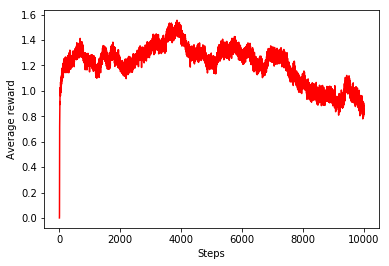

In [3]:
fig1 = plt.figure().add_subplot(111)

n_pulls = 10000

epsilon = [0.1]

alpha = 0.1

epsilon = [0.1]

for eps in range(len(epsilon)):
  print("Current epsilon", eps)
  Q = np.zeros((n_bandit, k))
  N = np.ones((n_bandit, k))
  Qi = np.random.normal(q_true, 1)
  
  R_eps = []
  R_eps.append(0)
  R_eps.append(np.mean(Qi))
  R_eps_opt = []
  
  col = ['r', 'g', 'k', 'b', 'y']
  
  for pull in range(2, n_pulls+1):
    R_pull = []
    opt_arm_pull = 0
    q_pull = np.random.normal(0, 0.01, (k))
    for i in range(n_bandit):
      if random.random()<epsilon[eps]:
        j = np.random.randint(k)
      else:
        j = np.argmax(Q[i])
      if j==true_opt_arms[i]:
        opt_arm_pull = opt_arm_pull + 1
      
      for l in range(0, k):
        q_true[i][l] = q_true[i][l] + q_pull[l]
      temp_R = np.random.normal(q_true[i][j], 1)
      R_pull.append(temp_R)
      N[i][j] = N[i][j] + 1
      Q[i][j] = Q[i][j] + (temp_R - Q[i][j])/N[i][j]
      
    avg_R_pull = np.mean(R_pull)
    R_eps.append(avg_R_pull)
  fig1.plot(range(0, n_pulls + 1), R_eps, col[eps])
fig1.set_ylabel('Average reward')
fig1.set_xlabel('Steps')
plt.show()

Current epsilon 0


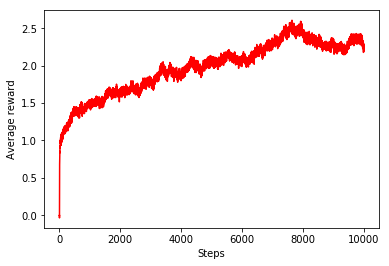

In [0]:
n_bandit = 2000
k = 10
n_pulls = 1000

q_true = np.random.normal(0, 1, (n_bandit, k))
true_opt_arms = np.argmax(q_true, 1)

epsilon = [0, 0.01, 0.1, 0.2, 1]

fig2 = plt.figure().add_subplot(111)

n_pulls = 10000

epsilon = [0.1]

alpha = 0.1

for eps in range(len(epsilon)):
  print("Current epsilon", eps)
  Q = np.zeros((n_bandit, k))
  N = np.ones((n_bandit, k))
  Qi = np.random.normal(q_true, 1)
  
  R_eps = []
  R_eps.append(0)
  R_eps.append(np.mean(Qi))
  R_eps_opt = []
  
  col = ['r', 'g', 'k', 'b', 'y']
  
  for pull in range(2, n_pulls+1):
    R_pull = []
    opt_arm_pull = 0
    q_pull = np.random.normal(0, 0.01, (k))
    for i in range(n_bandit):
      if random.random()<epsilon[eps]:
        j = np.random.randint(k)
      else:
        j = np.argmax(Q[i])
      if j==true_opt_arms[i]:
        opt_arm_pull = opt_arm_pull + 1
      
      for l in range(0, k):
        q_true[i][l] = q_true[i][l] + q_pull[l]
      temp_R = np.random.normal(q_true[i][j], 1)
      R_pull.append(temp_R)
      N[i][j] = N[i][j] + 1
      Q[i][j] = Q[i][j] + alpha*(temp_R - Q[i][j])
      
    avg_R_pull = np.mean(R_pull)
    R_eps.append(avg_R_pull)
  fig2.plot(range(0, n_pulls + 1), R_eps, col[eps])
fig2.set_ylabel('Average reward')
fig2.set_xlabel('Steps')
plt.show()